In [68]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('pokemon.csv')

In [69]:
df.iloc[773]['capture_rate']

'30 (Meteorite)255 (Core)'

In [70]:
df = df.drop(773)

In [71]:
df['base_happiness'].dtype

dtype('int64')

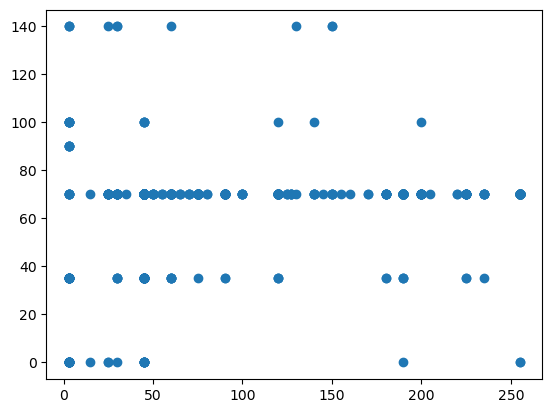

In [72]:
df['capture_rate'] = df['capture_rate'].astype(int)
plt.scatter(df['capture_rate'], df['base_happiness'])

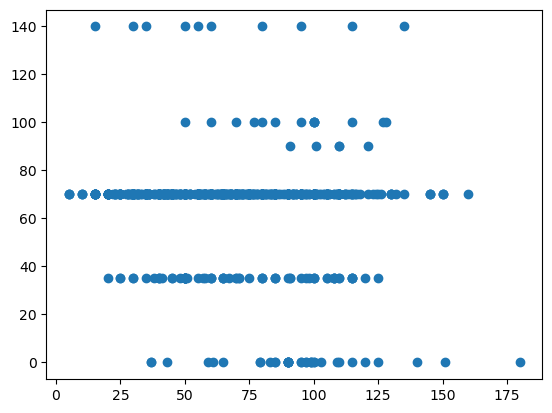

In [73]:
plt.scatter(df['speed'], df['base_happiness'])

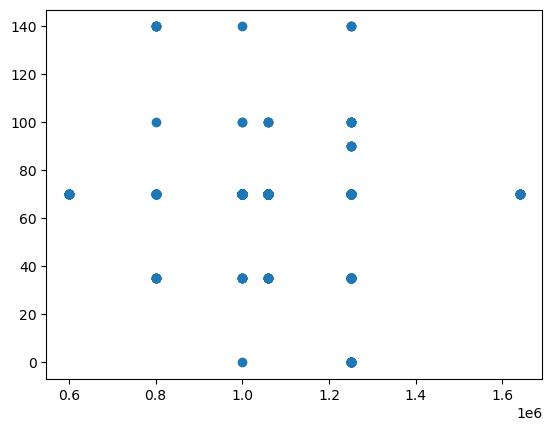

In [74]:
plt.scatter(df['experience_growth'], df['base_happiness'])

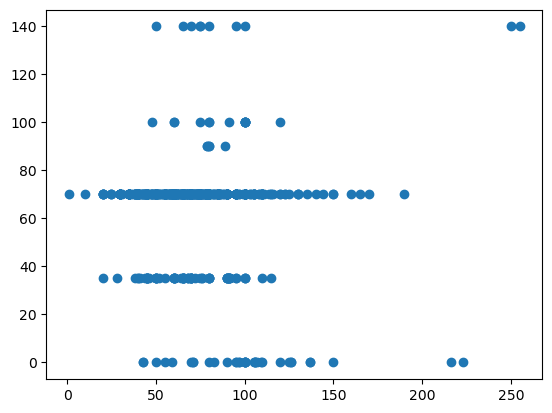

In [75]:
plt.scatter(df['hp'], df['base_happiness'])

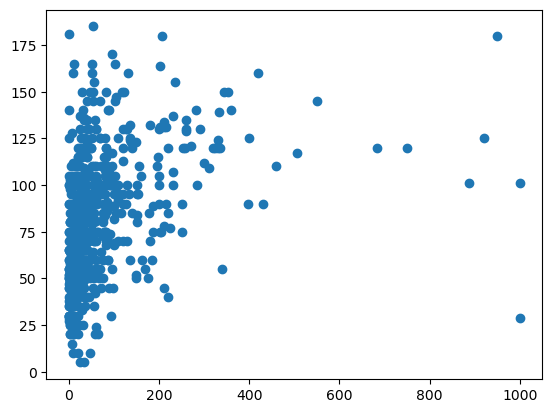

In [76]:
plt.scatter(df['weight_kg'], df['attack'])

In [81]:
_25 = query['weight_kg'].quantile(0.25)
_75 = query['weight_kg'].quantile(0.75)
iqr = _75-_25
upper_bound = _75 + 1.5*iqr

LinregressResult(slope=0.49801025723321857, intercept=-3.600641848670712, rvalue=0.4634353706979314, pvalue=1.4624743546384999e-38, stderr=0.03604285569724873, intercept_stderr=2.894031947286435)

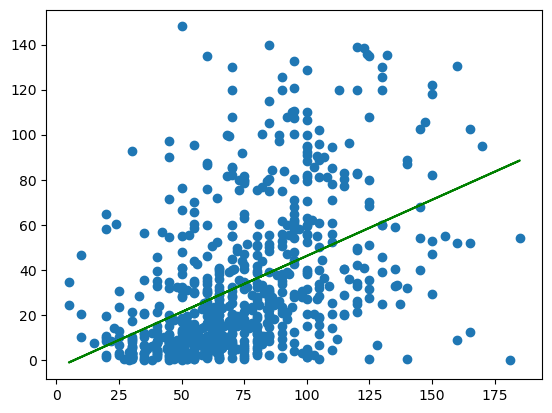

In [83]:
import scipy.stats as sts
query = df[~df['weight_kg'].isna()].query("weight_kg < @upper_bound")
plt.scatter(query['attack'], query['weight_kg'])
slope, intercept, rvalue, pvalue, stderr = sts.linregress(query['attack'], query['weight_kg'])
regress_values = query['attack'] * slope + intercept
plt.plot(query['attack'], regress_values, color='green')
sts.linregress(query['attack'], query['weight_kg'])


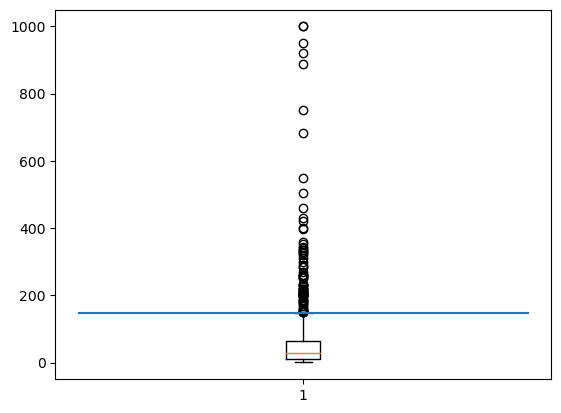

In [54]:
plt.boxplot(query['weight_kg'])
plt.hlines(148.625, 0, 2, alpha=1)

<Axes: xlabel='type1'>

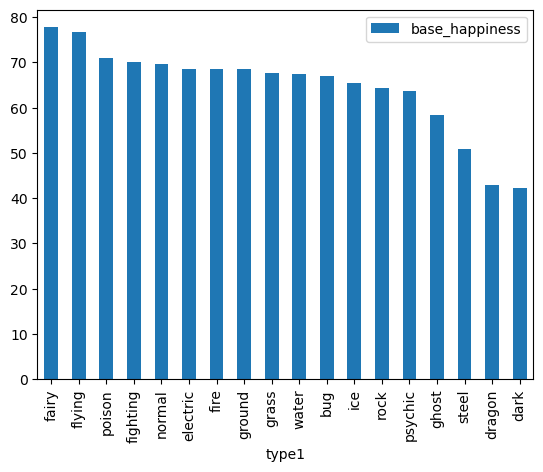

In [40]:
df = df.groupby('type1')[['base_happiness']].mean().sort_values('base_happiness', ascending=False)
df.plot(kind='bar')